In [23]:
import pandas as pd

In [24]:
dataset = pd.read_csv('./datset.csv', sep='\t').fillna(0)

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_21452\2671712720.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./datset.csv', sep='\t').fillna(0)


In [25]:
def rename_id(id, n):
    four_numbers = str(id)[:n]
    if four_numbers == 'X' * n:
        return 9800
    else:
        return int(four_numbers)
dataset.tnved = dataset.tnved.apply(lambda x: rename_id(x, 4))
dataset.Stoim = dataset.Stoim.apply(lambda x: x.replace(',','.')).astype('float32')
dataset

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ЭК,08/2021,OS,8414,796.0,54.349998,"3,56",1,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,IT,8435,0.0,1428.859985,15,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,DE,8418,0.0,52013.980469,"494,919",0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ИМ,07/2021,DE,8422,0.0,11525.410156,32,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,06/2021,OS,8421,796.0,17.420000,1,2,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4913021,ИМ,08/2021,CN,8433,0.0,17492.269531,"10153,49",0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913022,ИМ,05/2021,CN,8431,0.0,24936.800781,8600,0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913023,ИМ,11/2021,CN,8412,796.0,284.000000,"51,4",6,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913024,ИМ,05/2021,KR,8413,796.0,9055.000000,45,1,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [26]:
dataset[dataset.tnved == 9800]

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
63,ИМ,08/2021,IR,9800,0.0,18948.660156,37590,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
66,ЭК,02/2021,IR,9800,0.0,83997.312500,171763,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
67,ЭК,12/2021,IR,9800,0.0,19200.000000,80000,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
68,ИМ,07/2021,IR,9800,0.0,30218.759766,60246,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
69,ЭК,03/2021,IR,9800,0.0,19253.150391,42922,0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4912572,ИМ,06/2021,CN,9800,0.0,22535.359375,5880,0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4912574,ИМ,10/2021,CN,9800,0.0,170492.296875,170925,0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4912576,ИМ,09/2021,CN,9800,0.0,530108.187500,"170829,66",0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4912577,ИМ,12/2021,CN,9800,0.0,35128.609375,"19309,5",0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [27]:
def create_subtable(data, napr: str, tnved, region=None):
    if region == None: 
        return data[(data.napr == napr) & (data.tnved == tnved)]
    return data[(data.napr == napr) & (data.tnved == tnved) & (data.Region == region)]

In [30]:
test_df = create_subtable(dataset, 'ИМ', 8414)

In [31]:
test_df

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
684,ИМ,10/2021,TR,8414,796.0,9423.120117,955,1,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1813,ИМ,08/2021,US,8414,796.0,15808.799805,1280,8,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2195,ИМ,08/2021,US,8414,0.0,568.580017,"35,4",0,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2200,ИМ,04/2021,BY,8414,796.0,7.240000,"0,7",1,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2201,ИМ,02/2021,BY,8414,796.0,5.090000,"0,75",1,90000 - РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ,08-СЕВЕРО-КАВКАЗСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4912949,ИМ,10/2021,CN,8414,0.0,14454.150391,"1146,004",0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4912950,ИМ,12/2021,CN,8414,0.0,10446.469727,"760,525",0,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4912954,ИМ,09/2021,CN,8414,796.0,15381.660156,"2266,6",18,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913017,ИМ,06/2021,CN,8414,796.0,5368.490234,601,18,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [48]:
test_df_group = pd.DataFrame(test_df.groupby(['period', 'nastranapr']).sum()['Stoim']).reset_index()

In [66]:
test_df_group

,period,nastranapr,Stoim
0,01/2021,AE,3.136600e+02
1,01/2021,AM,4.066459e+04
2,01/2021,AR,2.201280e+03
3,01/2021,AT,1.115466e+05
4,01/2021,AU,6.375400e+03
...,...,...,...
747,12/2021,UA,3.059351e+06
748,12/2021,US,4.456202e+06
749,12/2021,UZ,1.198756e+05
750,12/2021,VN,1.965899e+04


In [74]:
import matplotlib.pyplot as plt
test_df_group = test_df_group.pivot(index="period", columns='nastranapr', values='Stoim')

In [77]:
test_df_group

nastranapr,AE,AF,AM,AR,AT,AU,AZ,BA,BE,BG,...,SS,SZ,TH,TR,TW,UA,US,UZ,VN,ZA
period,,,,,,,,,,,,,,,,,,,,,
01/2021,313.660004,NaN,40664.589844,2.201280e+03,1.115466e+05,6375.399902,NaN,NaN,1863792.75,67636.390625,...,200.000000,NaN,218006.25000,2264421.25,6.773529e+05,2423791.25,1751459.00,175697.500000,115369.765625,256.149994
02/2021,2000.000000,215.960007,5560.679688,8.236506e+05,3.979819e+05,16976.281250,NaN,NaN,4997728.50,95219.781250,...,NaN,NaN,503893.34375,2483569.75,6.767259e+05,2508049.25,3886942.75,27502.119141,67265.953125,5077.600098
03/2021,NaN,NaN,5489.709961,2.929112e+05,2.329940e+05,12493.339844,NaN,NaN,5314237.50,196092.156250,...,NaN,NaN,355959.03125,4281537.50,1.184570e+06,3850292.25,4089754.25,85417.335938,413253.500000,2077.050049
04/2021,NaN,NaN,32206.900391,2.961330e+03,2.308865e+05,10554.629883,NaN,NaN,4009994.00,151189.421875,...,NaN,NaN,431384.18750,3384579.50,8.014656e+05,3863118.00,3046118.50,44752.000000,705256.875000,2285.510010
05/2021,484.989990,208.080002,11283.339844,1.716235e+05,1.480790e+06,8582.400391,NaN,NaN,2544996.75,52592.230469,...,829.190002,NaN,398949.56250,3767944.00,1.282030e+06,2621741.25,4816188.50,19417.589844,543594.750000,128.809998
06/2021,NaN,628.770020,6376.790039,3.134346e+05,3.199704e+05,92980.351562,NaN,38.18,4117059.25,214525.656250,...,200.000000,NaN,527324.25000,4323363.50,7.532565e+05,3832048.25,3830008.25,79917.101562,363960.031250,147.059998
07/2021,NaN,NaN,15187.500000,5.962440e+03,4.063855e+05,18612.619141,NaN,NaN,3354519.75,75919.171875,...,NaN,NaN,469871.78125,3821872.00,8.234470e+05,2975813.50,2878733.00,65529.269531,101646.664062,7841.879883
08/2021,NaN,NaN,44175.859375,1.738600e+06,4.424836e+05,4884.509766,NaN,NaN,4023479.50,185087.109375,...,NaN,NaN,411188.18750,5960457.50,7.578298e+05,2889436.50,4642124.00,42637.000000,92415.187500,2355.300049
09/2021,NaN,NaN,10857.770508,2.273630e+03,3.281937e+06,22529.919922,NaN,NaN,3800416.00,101433.054688,...,NaN,NaN,572888.50000,4398379.50,8.429278e+05,2630251.25,5099165.50,18158.070312,28600.128906,373.929993


In [102]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(pd.to_datetime(test_df_group.CH[:-2].index).values.astype('datetime64[M]').astype(int).reshape(-1, 1), test_df_group.CH[:-2])

LinearRegression()

In [104]:
a = reg.predict(pd.to_datetime(test_df_group.CH[:-2].index).values.astype('datetime64[M]').astype(int).reshape(-1, 1))

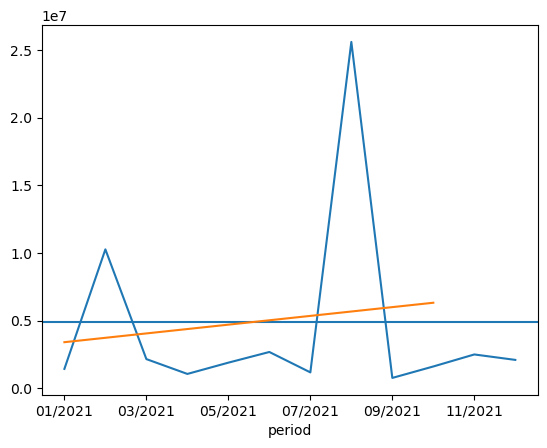

In [110]:
# test_df_group.CH.plot()
test_df_group.CH.plot()

plt.axhline(test_df_group.CH[:-2].mean())
plt.plot(test_df_group.CH[:-2].index, reg.predict(pd.to_datetime(test_df_group.CH[:-2].index).values.astype('datetime64[M]').astype(int).reshape(-1, 1)))

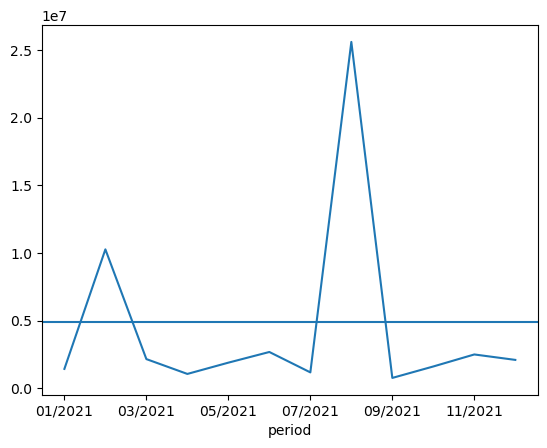

In [87]:
test_df_group.CH.plot()
plt.axhline(test_df_group.CH[:-2].mean())

In [86]:
test_df_group.CH[:-2].mean()

4866855.0

In [58]:
test_df_group[['period', 'Stoim']]

,period,Stoim
0,01/2021,3.136600e+02
1,01/2021,4.066459e+04
2,01/2021,2.201280e+03
3,01/2021,1.115466e+05
4,01/2021,6.375400e+03
...,...,...
747,12/2021,3.059351e+06
748,12/2021,4.456202e+06
749,12/2021,1.198756e+05
750,12/2021,1.965899e+04
